# Tutorial de Big Data
## Bienvenidos a la clase 2

### Temario:

- Introducción a tweepy, textblob, nltk
- Ejercicio práctico: Analisis de sentimiento de tweets de Joe Biden pre y post elecciones
- Introducción a la Tarea 1 parte 2 

### Respuestas a las preguntas de los videos:

### Analisis de sentimiento de tweets de Joe Biden pre y post elecciones

In [3]:
#importamos los paquetes a utilizar
import os
import re
import string
import pandas as pd
import tweepy
import matplotlib.pyplot as plt
from textblob import TextBlob
from datetime import datetime

import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

Crear con Sublime (u otro editor de texto) un archivo llamado `twitter_keys.txt` dentro de la carpeta `clase5` y guardar las 4 claves, una por línea, en el siguiente orden:
- API key
- API key secret
- Access token
- Access token secret

In [4]:
#Creamos variables que contienen nuestas claves de autenticación con la API
with open("twitter_keys.txt") as tw_k: 
    consumer_key = tw_k.readline().strip()
    consumer_secret = tw_k.readline().strip()
    access_key = tw_k.readline().strip()
    access_secret = tw_k.readline().strip()

In [5]:
#Le pasamos nuestras credenciales de twitter a tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth)

In [7]:
def get_all_tweets(screen_name, start_date):
    '''
    Esta funcion recibe el nombre de la persona de quien queremos extraer los 
    tweets y devuelve una lista con todos los tweets y sus datos
    Input: 
      screen_name (str): el nombre de la persona en twitter
      start_date(datetime): fecha desde la que se quieren los tweets
    Output:
      all_tweets (lista): lista con todos los tweets extraidos
    '''
    # Solicitamos los 200 tweets mas recientes (200 es el maximo permitido en count)
    new_tweets = api.user_timeline(screen_name=screen_name, 
                                   tweet_mode="extended", count=200)
    # Creo una lista para almacenar TODOS los tweets y agrego los recién extraidos
    all_tweets = []
    all_tweets.extend(new_tweets)
    # guardo el id del ultimo tweet extraído 
    oldest = all_tweets[-1].id 
    
    # extraigo tweets de a 200 hasta que no haya más
    while len(new_tweets) > 0 and all_tweets[-1].created_at > start_date:
        # Solicito 200 tweets mas y los agrego a la lista de 'all_tweets'
        new_tweets = api.user_timeline(screen_name=screen_name, count=200,
                                       tweet_mode="extended", max_id=oldest-1)
        all_tweets.extend(new_tweets)
        # actualizo el id del ultimo tweet extraído
        oldest = all_tweets[-1].id 
        print("Hasta ahora se han extraido %s tweets" % len(all_tweets))

    return all_tweets


In [8]:
date_before_elections = datetime(2020, 10, 16, 0, 0, 0)
all_tweets_biden = get_all_tweets("JoeBiden", date_before_elections)

Hasta ahora se han extraido 400 tweets
Hasta ahora se han extraido 600 tweets
Hasta ahora se han extraido 800 tweets
Hasta ahora se han extraido 1000 tweets
Hasta ahora se han extraido 1200 tweets
Hasta ahora se han extraido 1400 tweets


In [9]:
#Veamos la lista con los primeros 5 tweets 
all_tweets_biden[:5]


[Status(_api=<tweepy.api.API object at 0x11ad47070>, _json={'created_at': 'Mon Aug 23 16:39:38 +0000 2021', 'id': 1429845800612413441, 'id_str': '1429845800612413441', 'full_text': "Once screened and cleared, we will welcome Afghans who helped us in the war effort to their new home in the United States of America. \n\nBecause that's who we are. That's what America is.", 'truncated': False, 'display_text_range': [0, 186], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}, 'source': '<a href="https://sproutsocial.com" rel="nofollow">Sprout Social</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 939091, 'id_str': '939091', 'name': 'Joe Biden', 'screen_name': 'JoeBiden', 'location': 'Washington, DC', 'description': 'Husband to @DrBiden, proud father and grandfather. Ready to build back better for all Americans. Official account is @

In [10]:
def save_tweets_text(all_tweets, csv_file=None):
    '''
    Esta función guarda los tweets en un data frame y si se especifica un 
    archivo csv tambien se guardaran ahí 
    Input:
        all_tweets (lista): lista con tweets y sus datos
        csv_file ('str'): nombre del archivo csv
    Output:
        df_all_tweets (df): tweets ordenados en una tabla con datos seleccinados
    '''
    all_tweets_selection = []
    for tweet in all_tweets:
        one_tweet = [tweet.id_str, tweet.created_at, tweet.full_text, 
                     tweet.retweeted, tweet.favorite_count, 
                     tweet.in_reply_to_screen_name]
        all_tweets_selection.append(one_tweet)
    
    df_all_tweets = pd.DataFrame(all_tweets_selection)
    df_all_tweets.columns = ['id_str', 'created_at', 'text', 'retweeted',
                            'favorite_count', 'in_reply_to_screen_name']
    if csv_file:
        df_all_tweets.to_csv(csv_file, index=False, encoding="utf-8")

    return df_all_tweets

In [11]:
df_all_tweets = save_tweets_text(all_tweets_biden, "tweets.csv")
df_all_tweets

,id_str,created_at,text,retweeted,favorite_count,in_reply_to_screen_name
0,1429845800612413441,2021-08-23 16:39:38,"Once screened and cleared, we will welcome Afg...",False,31362,None
1,1429611346346250242,2021-08-23 01:08:00,To those in Henri’s path: Don't forget that yo...,False,35143,None
2,1429504471395078144,2021-08-22 18:03:19,RT @POTUS: Today at 4 PM ET I will address the...,False,0,None
3,1428130239016747016,2021-08-18 23:02:37,RT @POTUS: We will not sit by as Governors try...,False,0,None
4,1428058056672247813,2021-08-18 18:15:47,Human rights must be the center of our foreign...,False,18414,None
...,...,...,...,...,...,...
1395,1314018358950604801,2020-10-08 01:42:44,RT @KamalaHarris: .@JoeBiden and I believe the...,False,0,None
1396,1314017178258223110,2020-10-08 01:38:03,RT @KamalaHarris: The day @JoeBiden asked me t...,False,0,None
1397,1314017154379939842,2020-10-08 01:37:57,RT @KamalaHarris: Donald Trump paid $750 in ta...,False,0,None
1398,1314014722405150722,2020-10-08 01:28:17,.@KamalaHarris is showing the American people ...,False,530264,None


In [12]:
# Emoticons contentos
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])
 
# Emoticons Tristes
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])

#combine sad and happy emoticons
emoticons = emoticons_happy.union(emoticons_sad)

In [13]:
#Emoji patterns
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # simbolos & pictogramas
                           u"\U0001F680-\U0001F6FF"  # transporte & simbolos mapas
                           u"\U0001F1E0-\U0001F1FF"  # banderas (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)


In [14]:
#mrhod clean_tweets()
def clean_tweets(tweet):
    '''
    Esta función limpia el texto del tweet. Elimina emoticones, palabras vacías,
    links, indicaciones de retweets, etc. Para dejar en el texto solo las
    palabras con mayor contenido.
    Input:
        tweet (str): Texto del tweet original
    Output:
        tweet (str): Texto del tweet limpiado
    '''
    #Elimino caracteres de re-tweets   
    tweet = re.sub(r'^RT .*:', '', tweet)
    tweet = re.sub(r'@\S+', '', tweet)
    tweet = re.sub(r':', '', tweet)
    tweet = re.sub(r'‚Ä¶', '', tweet)
    #Reemplazo caracteres non-ASCII con espacio
    tweet = re.sub(r'[^\x00-\x7F]+',' ', tweet)
    #Saco los links
    tweet = re.sub(r'https.*', '', tweet)
    #Saco los emoji
    tweet = emoji_pattern.sub(r'', tweet)
    
    #Separo los tweets in tokens
    word_tokens = word_tokenize(tweet)
    #Obtengo set de palabras vacias para luego eliminarlas
    stop_words = set(stopwords.words('english'))
    
    #loop por las condiciones
    filtered_tweet = []
    for w in word_tokens:
        #check tokens against stop words , emoticons and punctuations
        if w not in stop_words and w not in emoticons and \
           w not in string.punctuation:
            filtered_tweet.append(w)

    
    return ' '.join(filtered_tweet)

In [15]:
#Este es un tweet sucio:
df_all_tweets.iloc[3]['text']

'RT @POTUS: We will not sit by as Governors try to block or intimidate educators protecting kids against COVID-19.\n \nThis isn’t about politi…'

In [16]:
#Este es un tweet limpio:
clean_tweets(df_all_tweets.iloc[3]['text'])

'We sit Governors try block intimidate educators protecting kids COVID-19 This politi'

In [17]:
start_time = datetime.strptime("2020-10-20", '%Y-%m-%d')
end_time = datetime.strptime("2020-11-18", '%Y-%m-%d')

def filter_year_and_month(date, start_time, end_time):
    '''
    Recibe una fecha y devuelve True, si la fecha de la fila esta 
    dentro de los dias especificados como inicio y fin, caso 
    contrario False.
    '''
    dd = datetime.strptime(str(date), '%Y-%m-%d %H:%M:%S')
    return dd > start_time and dd < end_time


In [18]:
def generate_sentiment(texto):
    '''
    Esta funcion limpia el texto y analiza el sentimiento.
    Input:
        texto (str): texto a limpiar y analizar
    Output:
         polarity (float): en el rango [-1.0, 1.0] 
         subjectivity (float): en el rango [0.0, 1.0] 
    '''
    # Limpiamos el texto del tweet
    filtered_tweet = clean_tweets(texto)
    # Calculamos el sentimiento con el metodo TextBlob
    blob = TextBlob(filtered_tweet)
    Sentiment = blob.sentiment

    polarity = Sentiment.polarity
    subjectivity = Sentiment.subjectivity            

    return polarity, subjectivity
    

In [19]:
def add_sentiment(df, start_time, end_time):
    '''
    Esta funcion filtra los tweets entre las fechas de inicio y fin
    indicadas y agrega dos columnas, una de polarity y otra de subjectivity.
    Input:
        df (dataframe): tabla con los tweets en una columa llamada text
        start_time (datetime): fecha del tweet más antiguo a conservar
        end_time (datetime): fecha del tweet más reciente a conservar
    Output:
        df (dataframe): df actualizado con el filtro y nuevas columnas
    '''
    df = df[df.apply(lambda row: filter_year_and_month(row['created_at'], 
                                                start_time, end_time), axis=1)]

    df[["polarity", "subjectivity"]] = pd.DataFrame(df.apply(lambda row: \
                                            generate_sentiment(row['text']), \
                                            axis=1).tolist(), index=df.index)
    
    return df

In [20]:
tweets_sentimiento = add_sentiment(df_all_tweets, start_time, end_time)
tweets_sentimiento

/Users/camilasury/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,id_str,created_at,text,retweeted,favorite_count,in_reply_to_screen_name,polarity,subjectivity
680,1328837822950752259,2020-11-17 23:10:00,"Today, @KamalaHarris and I met with some of ou...",False,116342,None,0.500000,0.700000
681,1328790008963227649,2020-11-17 20:00:00,I’m keeping in my prayers all of our friends a...,False,266987,None,0.266667,0.583333
682,1328734005404061701,2020-11-17 16:17:28,RT @Transition46: Our White House senior staff...,False,0,None,0.000000,0.000000
683,1328474177007972354,2020-11-16 23:05:00,Americans want us to cooperate. They want us t...,False,133705,None,0.500000,0.812500
684,1328467885279375361,2020-11-16 22:40:00,"When we build back better, we will do so with ...",False,195993,None,0.250000,0.285714
...,...,...,...,...,...,...,...,...
1190,1318561610235981824,2020-10-20 14:36:00,"The simple, sad truth is that this president i...",False,60008,None,-0.166667,0.452381
1191,1318361290306392064,2020-10-20 01:20:00,Pennsylvania — there are just a few hours left...,False,18246,None,0.000000,0.000000
1192,1318357515680116737,2020-10-20 01:05:00,"For once, Donald Trump is correct: I will list...",False,210333,None,0.000000,0.000000
1193,1318352230458609664,2020-10-20 00:44:00,I will be a president who pushes towards the f...,False,338918,None,-0.125000,0.187500


## Trabajo Practico 1 - Parte 2

### Reglas de formato y presentación
- El trabajo debe estar bien comentado (utilizando #) para que el codigo sea facíl de entender por sus compañeros y profesores.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Lunes 23/8 a las 23:59hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub con el mensaje “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 - Parte 1 deben estar dentro de esa carpeta.
- Tambíen deben completar el link de su repositorio -para que pueda ser clonado y corregido- en la siguiente google sheet: https://docs.google.com/spreadsheets/d/1qaXCveEw3MjEwXQsu2zpqUz34BiaCMR0WapcsQ7jGs0/edit?usp=sharing
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No completen la google sheet hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, yo no corregiré sus tareas hasta no ver el link en la google sheet.
    - No hagan nuevos <i>push</i> despues de habér entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

#### Ejercicio 1: 
Impriman algunos de los tweets más negativos (filtrando por la columna de `polarity`) y su fecha

In [21]:
# Hago un for loop para que haga con cada valor de la columna "polarity" un filtro de "negatividad"
# Si lo cumple, hace print del tweet y la fecha
# Utilizamos .index para para poder iterar por filas
for i in tweets_sentimiento.index:
     if tweets_sentimiento["polarity"][i] < -0.5:
        print(tweets_sentimiento["text"][i], tweets_sentimiento["created_at"][i])
        print("-----------")
#Para cada fila le indicamos que si la polaridad del tweet es menor a -0.5 entonces imprima
#el texto del tweet seguido de la fecha de creación 

Today marks five years since the horrific ISIS terrorist attacks in Paris — an assault not just on the people of France but against our common humanity.

As president, I will work to protect Americans and our allies, countering terrorism and extremist violence in all forms. 2020-11-13 21:05:00
-----------
If you’re sick, if you’re struggling, if you’re worried about how you’re going to get through the day — we will not abandon you.

We will not leave you to face these challenges alone. https://t.co/eZUHaFE5bl 2020-11-11 00:45:00
-----------
After tonight's horrific terrorist attack in Vienna, Austria, Jill and I are keeping the victims and their families in our prayers. We must all stand united against hate and violence. 2020-11-03 02:50:00
-----------
The hard truth is that under President Trump, we’ve become weaker, sicker, poorer, more divided, and more violent. 2020-11-01 02:04:00
-----------
Listening to scientists is not a bad thing.

I can’t believe that has to be said. 2020-10-

#### Ejercicio 2: 
Impriman algunos de los tweets más positivos (filtrando por la columna de `polarity`) y su fecha

In [22]:
# Hago un for loop para que haga con cada valor de la columna "polarity" un filtro de "positividad"
# Si lo cumple, hace print del tweet y la fecha
# Utilizamos .index para para poder iterar por filas
for i in tweets_sentimiento.index:
     if tweets_sentimiento["polarity"][i] > 0.5:
        print(tweets_sentimiento["text"][i], tweets_sentimiento["created_at"][i])
        print("-----------")
#Para cada fila le indicamos que si la polaridad del tweet es mayor a 0.5 entonces imprima
#el texto del tweet seguido de la fecha de creación 
        

Once again, I congratulate the brilliant women and men who produced this breakthrough and have brought us one step closer to beating this virus. I am also thankful for the frontline workers who are still confronting the virus around the clock. 2020-11-16 14:07:25
-----------
To the millions of Hindus, Jains, Sikhs, and Buddhists celebrating the Festival of Lights, @DrBiden and I send our best wishes for a #HappyDiwali. May your new year be filled with hope, happiness, and prosperity. Sal Mubarak. 2020-11-14 16:30:00
-----------
Today, we honor the service of those who have worn the uniform of the Armed Forces of the United States. 

To our proud veterans—I will be a commander in chief who respects your sacrifice, understands your service, and will never betray the values you fought so bravely to defend. 2020-11-11 16:08:11
-----------
Tonight, the whole world is watching America. I believe at our best America is a beacon for the globe.

And we lead not by the example of our power, but 

#### Ejercicio 3: 
Agreguenle al df llamado `tweets_sentimiento` una nueva columna llamada `positivo` que tenga:
- 1 cuando el tweet tiene polarity > 0, 
- 0 cuando el tweet tiene polarity = 0, 
- -1 cuando el tweet tiene polarity < 0 

In [23]:
# Hago una columna nueva para el dataframe con valor 0
tweets_sentimiento = tweets_sentimiento.assign(positivo = 0)

In [36]:
# Le meto la condición a la columna nueva para que tome los valores -1 y 1 cuando corresponda
tweets_sentimiento.loc[tweets_sentimiento.polarity < 0, "positivo"] = -1
tweets_sentimiento.loc[tweets_sentimiento.polarity > 0, "positivo"] = 1
tweets_sentimiento.head(20)

,id_str,created_at,text,retweeted,favorite_count,in_reply_to_screen_name,polarity,subjectivity,positivo
680,1328837822950752259,2020-11-17 23:10:00,"Today, @KamalaHarris and I met with some of ou...",False,116342,None,0.500000,0.700000,1
681,1328790008963227649,2020-11-17 20:00:00,I’m keeping in my prayers all of our friends a...,False,266987,None,0.266667,0.583333,1
682,1328734005404061701,2020-11-17 16:17:28,RT @Transition46: Our White House senior staff...,False,0,None,0.000000,0.000000,0
683,1328474177007972354,2020-11-16 23:05:00,Americans want us to cooperate. They want us t...,False,133705,None,0.500000,0.812500,1
684,1328467885279375361,2020-11-16 22:40:00,"When we build back better, we will do so with ...",False,195993,None,0.250000,0.285714,1
685,1328461593848397827,2020-11-16 22:15:00,"Right now, Congress should come together and p...",False,306162,None,0.246429,0.308929,1
686,1328425157229113344,2020-11-16 19:50:13,Tune in as I deliver remarks on our economic r...,False,42937,None,0.162500,0.275000,1
687,1328338891544387585,2020-11-16 14:07:25,"Once again, I congratulate the brilliant women...",False,125249,JoeBiden,0.900000,1.000000,1
688,1328338687910928386,2020-11-16 14:06:37,Today's news of a second vaccine is further re...,False,376840,None,0.190000,0.326667,1
689,1328133691529375751,2020-11-16 00:32:02,Congratulations to NASA and SpaceX on today's ...,False,593453,None,0.000000,0.000000,0


#### Ejercicio 4: 
Agrupen los tweets por día y promedien el la polaridad. Luego hagan un gráfico con el sentimiento por día.

In [25]:
# Hago una variable nueva que tome a la columna "created_at" como formato fecha y que el paquete datetime la identifique
# como tal y le pongo "D" para que me haga el promedio de daily
tweets_sentimiento_prom = tweets_sentimiento.resample("D", on="created_at").mean()

<function matplotlib.pyplot.show(close=None, block=None)>

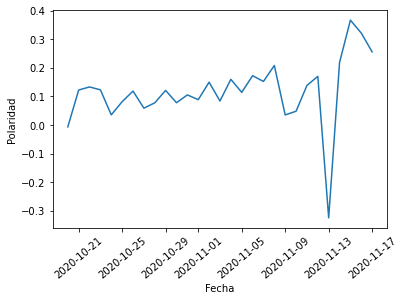

In [26]:
# Uso el paquete matplotlib para hacer el plot, y le agrego labels y hago rotación del x para que se puede leer
plt.plot(tweets_sentimiento_prom.polarity)
plt.xlabel("Fecha")
plt.ylabel("Polaridad")
plt.xticks(rotation = 40)
plt.show

#### Repaso del análisis de sentimiento: 
Por último, los invito a que exploren el análisis de sentimiento de forma teórica y práctica:
- Revisen la documentación de `TextBlob` y del método `sentiment` https://textblob.readthedocs.io/en/dev/ 
- Prueben en la practica el resultado que arroja para determinadas frases (les dejo unos ejemplos, pero pueden probar los que quieran)


In [27]:
blob = TextBlob('good')
blob.sentiment
#polaridad cercana al 1
#alta subjetividad

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

In [28]:
blob = TextBlob('bad')
blob.sentiment
#polaridad cercana al -1
#alta subjetividad

Sentiment(polarity=-0.6999999999999998, subjectivity=0.6666666666666666)

In [29]:
blob = TextBlob('Hate the quarentine')
blob.sentiment
#polaridad muy cercana al -1
#muy alta subjetividad

Sentiment(polarity=-0.8, subjectivity=0.9)

In [30]:
blob = TextBlob('Love my life')
blob.sentiment
#polaridad cercana al 1
#alta subjetividad

Sentiment(polarity=0.5, subjectivity=0.6)

In [34]:
blob = TextBlob('I love you')
blob.sentiment
#polaridad cercana al 1
#alta subjetividad

Sentiment(polarity=0.5, subjectivity=0.6)

In [35]:
blob = TextBlob('I hate microeconomics')
blob.sentiment
#polaridad muy cercana al -1
#muy alta subjetividad

Sentiment(polarity=-0.8, subjectivity=0.9)